### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import pydotplus

C:\Users\valej\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### Importing Data Set

In [2]:
df = pd.read_csv('C:/Users/valej/Desktop/DATA-765/HWs/loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


1)credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

2)purpose: The purpose of the loan (takes values “credit_card”, “debt_consolidation”, “educational”, “major_purchase”, “small_business”, and “all_other”).

3)int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

4)installment: The monthly installments ($) owed by the borrower if the loan is funded.

6)log.annual.inc: The natural log of the self-reported annual income of the borrower.

7)dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

8)fico: The FICO credit score of the borrower.

9)days.with.cr.line: The number of days the borrower has had a credit line.

10)revol.bal: The borrower’s revolving balance (amount unpaid at the end of the credit card billing cycle).

11)revol.util: The borrower’s revolving line utilization rate (the amount of the credit line used relative to total credit available).

12)inq.last.6mths: The borrower’s number of inquiries by creditors in the last 6 months.

13)delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

14)pub.rec: The borrower’s number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [3]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [4]:
categorical_features = ['purpose']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

In [5]:
X=df.drop('not.fully.paid',axis=1)
y=df['not.fully.paid']

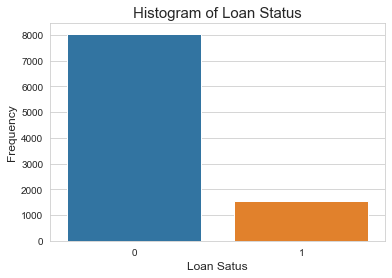

In [6]:
#description of target variable
sns.set_style('whitegrid')
sns.countplot(x='not.fully.paid',data=df)
plt.title("Histogram of Loan Status",fontsize=15)
plt.xlabel("Loan Satus",fontsize= 12)
plt.ylabel("Frequency",fontsize= 12);

### Splitting the data into Training and Testing
#### I used 30% for the test and 70% for training

In [7]:
#Creating training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state= 123)

### Imbalanced categories in the "not.fully.paid" target variable
Machine learning models work better when the samples in each class/category are close to equal (balanced). The data I am using for this model has a large imbalace in the 'not.fully.paid' vector. 

There are a handful of methods to deal with imbalanced data, most of them rely on resampling techniques. Given that I have too many "Good" observations in the target variable I decided to **under sample the majority class** to match the minority class. In order to accomplish this successfully, I need to make sure I split my data first. For more information on how to deal with imbalanced data click [here.](https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18)

#### Undersampling the majority class

In [8]:
from sklearn.utils import resample
#downsampling majority class
#concatenate our training data back together - AFTER SPLITTING
X = pd.concat([X_train, y_train], axis=1)
#separate minority and majority classes
default = X[X['not.fully.paid']==1]
good = X[X['not.fully.paid']==0]

good_downsampled = resample(good,
                            replace = False, # sample without replacement
                            n_samples = len(default), # match minority n
                            random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([good_downsampled,default])
downsampled['not.fully.paid'].value_counts()

1    1053
0    1053
Name: not.fully.paid, dtype: int64

Now the number of defaults and non-defaults is balanced

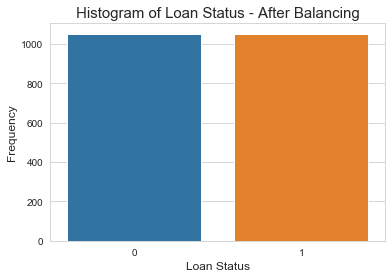

In [9]:
#description of target variable
sns.set_style('whitegrid')
sns.countplot(x='not.fully.paid',data=downsampled)
plt.title("Histogram of Loan Status - After Balancing",fontsize=15)
plt.xlabel("Loan Status",fontsize= 12)
plt.ylabel("Frequency",fontsize= 12);

### Redefining my features and target

In [10]:
df_final=downsampled
y_train = df_final['not.fully.paid'] #target var after rebalancing
X_train = df_final.drop('not.fully.paid',axis=1)#Features - explanatory vars
#Creating training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=.3,random_state= 123)

## Preliminary Model

#### Running Model

In [11]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Pedictions

In [12]:
rfc_pred = rfc.predict(X_test)

#### Confusion Matrix

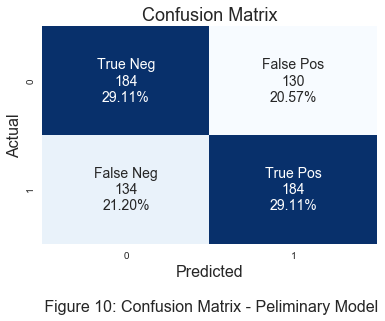

In [13]:
conf_matrix=confusion_matrix(y_test, rfc_pred)
labels=['True Neg','False Pos','False Neg', 'True Pos']
conf_vals = ['{0:0.0f}'.format(x) for x in conf_matrix.flatten()]
grp_pctg = ['{0:.2%}'.format(x) for x in conf_matrix.flatten()/np.sum(conf_matrix)]
final_labels=[f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(labels,conf_vals, grp_pctg)]
final_labels=np.asarray(final_labels).reshape(2,2)
sns.heatmap(conf_matrix/np.sum(conf_matrix),
            cmap='Blues',annot=final_labels,
            annot_kws={'size':14}, fmt= '',
            cbar=False)
plt.title("Confusion Matrix", fontsize=18)
plt.xlabel("Predicted\n\n Figure 10: Confusion Matrix - Peliminary Model",fontsize=16)
plt.ylabel("Actual",fontsize=16);

##### Analysis: 
About 29% of the times the model correctly predicted a default when it was an actual default.<br>About 29% of the times the model correctly predicted a non-default when it was an actual non-default<br>About 21% of the times the model shows a Type 1 error, the model predicted default when it was not.<br>About 21% of the times the model shows a Type 2 error, the model predicted a non-default when it is a default.

#### Model Accuracy Scoring
A simple way to analyse performance is with accuracy(number of correct predictions/number of predictions). To calculate the accuracy I will use the score() method in the SciKit-Learn package. The method is applied to the trained model and it provides a percentage of correct predictions. 

\begin{equation*}
Accuracy = \frac{\text{Number  of  correct  predictions}}{\text{Number  of  predictions}}
\end{equation*}

In [14]:
rfc.score(X_test, y_test)

0.5822784810126582

##### Analysis: 
The model's predictions are correct about **63%** of the times.

#### Classification Report

In [15]:
print(classification_report(y_test,rfc_pred,target_names=['Non-Default','Default']))

              precision    recall  f1-score   support

 Non-Default       0.58      0.59      0.58       314
     Default       0.59      0.58      0.58       318

    accuracy                           0.58       632
   macro avg       0.58      0.58      0.58       632
weighted avg       0.58      0.58      0.58       632



## Tuning Hyperparameters

Sometimes the number of trees that we use in the model impact the accuracy score. Therefore, it is very important to find the optimal number of trees the model needs. For this, I use the GridSearchCv library from Sklearn.

In [16]:
#num of trees in random forest
n_estimators= [100,150,200,250,300,350]
grid = {'n_estimators': n_estimators}

In [17]:
from sklearn.model_selection import GridSearchCV
prelim_model_grid_search = GridSearchCV(rfc, # My Model 
                                    grid,
                                    cv=2) # Number of Crossfolds
prelim_model_grid_search

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [18]:
X=df.drop('not.fully.paid',axis=1)
y=df['not.fully.paid']

In [19]:
prelim_model_grid_search.fit(X, y)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

#### GridSearchCv Results

In [20]:
cv_results = pd.DataFrame(prelim_model_grid_search.cv_results_)[['mean_test_score']]
cv_results = cv_results.rename(index={0:100,1:150,2:200,3:250,4:300,5:350})
cv_results.rename_axis('n_estimator')

,mean_test_score
n_estimator,
100,0.834621
150,0.833890
200,0.834203
250,0.835039
300,0.834934
350,0.833890


In [21]:
prelim_model_grid_search.best_params_

{'n_estimators': 250}

##### Analysis: 
The best estimator is **250**. This number of trees yield the highest means_test_score, which is the correct mean accuracy of the model.

## Final Model - After Tunning Hyperparameters
This final model will use the estimator found about.

#### Running Model

In [22]:
final_rfc=RandomForestClassifier(n_estimators=250)
final_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Predictions

In [23]:
final_rfc_pred = final_rfc.predict(X_test)

#### Confusion Matrix

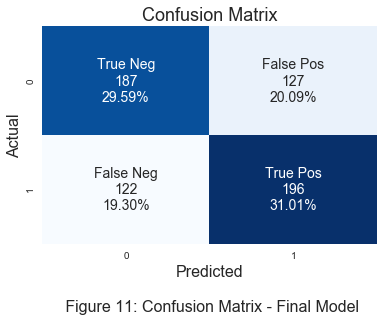

In [24]:
conf_matrix=confusion_matrix(y_test, final_rfc_pred)
labels=['True Neg','False Pos','False Neg', 'True Pos']
conf_vals = ['{0:0.0f}'.format(x) for x in conf_matrix.flatten()]
grp_pctg = ['{0:.2%}'.format(x) for x in conf_matrix.flatten()/np.sum(conf_matrix)]
final_labels=[f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(labels,conf_vals, grp_pctg)]
final_labels=np.asarray(final_labels).reshape(2,2)
sns.heatmap(conf_matrix/np.sum(conf_matrix),
            cmap='Blues',annot=final_labels,
            annot_kws={'size':14}, fmt= '',
            cbar=False)
plt.title("Confusion Matrix", fontsize=18)
plt.xlabel("Predicted\n\n Figure 11: Confusion Matrix - Final Model",fontsize=16)
plt.ylabel("Actual",fontsize=16);

##### Analysis: 
About 31% of the times the model correctly predicted a default when it was an actual default.<br>About 31% of the times the model correctly predicted a non-default when it was an actual non-default<br>About 18% of the times the model shows a Type 1 error, the model predicted default when it was not.<br>About 19% of the times the model shows a Type 2 error, the model predicted a non-default when it is a default.

#### Model Accuracy Scoring
\begin{equation*}
Accuracy = \frac{\text{Number  of  correct  predictions}}{\text{Number  of  predictions}}
\end{equation*}

In [25]:
final_rfc.score(X_test, y_test)

0.6060126582278481

#### Classification Report

In [26]:
print(classification_report(y_test,final_rfc_pred,target_names=['Non-Default','Default']))

              precision    recall  f1-score   support

 Non-Default       0.61      0.60      0.60       314
     Default       0.61      0.62      0.61       318

    accuracy                           0.61       632
   macro avg       0.61      0.61      0.61       632
weighted avg       0.61      0.61      0.61       632



## Predicting Probability of Default at a 60% Threshold
If the probability of default is greater than 60%, the prediction will be classified as "Default".

In [27]:
final_model_prob = final_rfc.predict_proba(X_test)

In [28]:
#Default Classification Reporting & setting threshold at .60
prob_default = pd.DataFrame(final_model_prob[:,1],columns=['Prob. of Default'])
#Reassigning a new loan status based on the probability of default being above .60
prob_default['loan_status_pred'] = prob_default['Prob. of Default'].apply(lambda x: 1 if x>.6 else 0)
prob_default['loan_status_pred'].value_counts()

0    483
1    149
Name: loan_status_pred, dtype: int64

DataFrame containig the predicted probabilities and its corresponding status based on the 60% default threshold classification. 

In [29]:
prob_default.head()

,Prob. of Default,loan_status_pred
0,0.456,0
1,0.284,0
2,0.500,0
3,0.536,0
4,0.424,0


In [30]:
print(classification_report(y_test, prob_default['loan_status_pred']))

              precision    recall  f1-score   support

           0       0.53      0.82      0.65       314
           1       0.62      0.29      0.40       318

    accuracy                           0.56       632
   macro avg       0.58      0.56      0.52       632
weighted avg       0.58      0.56      0.52       632



In [31]:
confusion_matrix(y_test,prob_default['loan_status_pred'])

array([[258,  56],
       [225,  93]], dtype=int64)

### Receiver Operating Characteristics(ROC) & Area Under the Curve (AUC)
In order to visualize the performance of the model, I created a ROC plot. I plotted the false positive rate (fallout,x) and true positive rate (sensitivity,y). To calculate the area under the curve I used roc_auc_score().
For more information on AUC-ROC click [Here](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

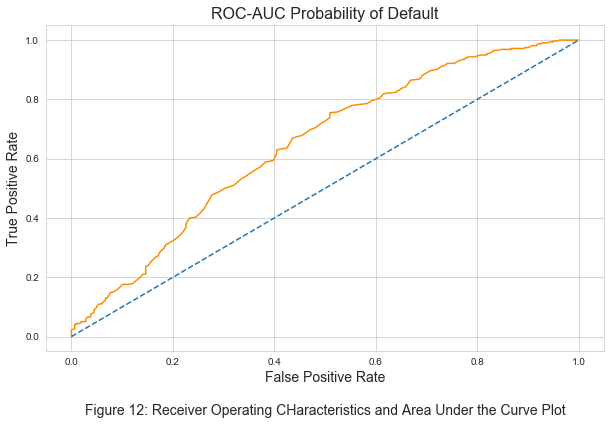

In [32]:
prob_default_auc = final_model_prob[:,1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default_auc)
plt.figure(figsize=(10,6))
plt.plot(fallout,sensitivity, color='darkorange')
plt.plot([0,1],[0,1], linestyle= '--')
plt.title("ROC-AUC Probability of Default",fontsize=16)
plt.xlabel("False Positive Rate\n\nFigure 12: Receiver Operating CHaracteristics and Area Under the Curve Plot",fontsize=14)
plt.ylabel("True Positive Rate",fontsize=14);

##### Analysis:
The dotted blue line represents a random prediction and the orange line represents the model prediction. The further away the orange line moves from the random prediction, the larger the area under the curve gets. The AUC is the calculation of the area between the model predictions and the random predictions. 

The roc_auc_score is a direct indicator of how well the model is capable of distiguishing between default and non-default. The higher the AUC, the better the model.

In [33]:
auc=roc_auc_score(y_test,prob_default_auc)
auc

0.6463566077795138

### Feature Importance

In [34]:
cols = ['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business']

In [35]:
feature_importance = pd.DataFrame(final_rfc.feature_importances_,index= cols,columns=['Importance'])
feature_importance = feature_importance.sort_values('Importance',ascending=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text yticklabel objects>)

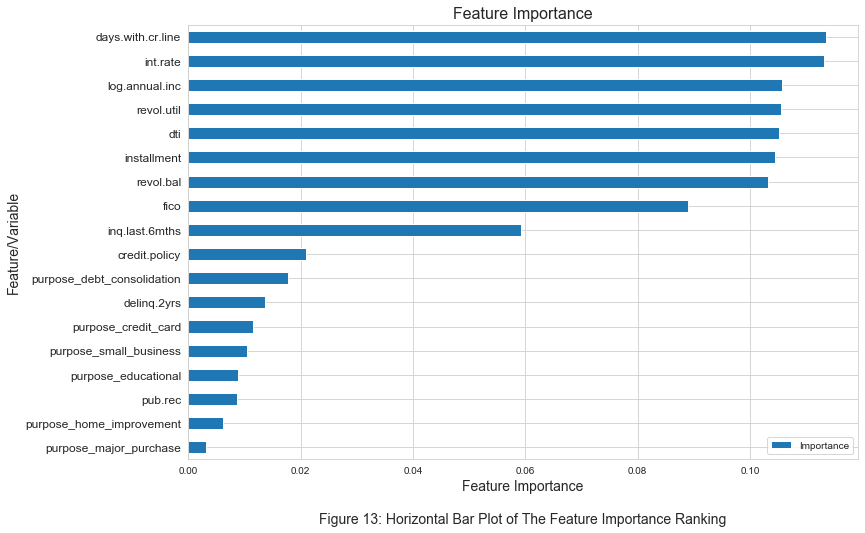

In [36]:
feature_importance.plot.barh(figsize=(12,8))
plt.title('Feature Importance',fontsize=16)
plt.xlabel('Feature Importance\n\nFigure 13: Horizontal Bar Plot of The Feature Importance Ranking',
          fontsize=14)
plt.ylabel('Feature/Variable',fontsize=14)
plt.yticks(fontsize=12)

### Estimating Expected Loss

In [37]:
num_defaults = prob_default['loan_status_pred'].value_counts()[1]#Number of predicted defaults
default_recall = precision_recall_fscore_support(y_test, prob_default['loan_status_pred'])[1][1]
default_recall

0.29245283018867924

In [38]:
#calculating the estimated impact of the new default recall rate
avg_loan_amnt = 10000 # $UDS
el_benchMark=num_defaults * avg_loan_amnt* (default_recall)
print(el_benchMark)
#print(num_defaults * avg_loan_amnt* (default_recall))

435754.71698113205


##### Analysis:
The expected loss, while using a 60% threshold and USD 10,000.00 average loans, is **USD $419,496.86**

### Running the Model With Test Datasets
#### testData1: 10% lower installments

In [39]:
dict = {'int.rate':0.9,'days.with.cr.line':1.1,'installment': 0.9,'log.annual.inc':1.1,'revol.bal':0.9,'revol.util':0.9}

In [40]:
el_={}
for var in dict:
    testData1 = X_test.copy()
    testData1[var]=testData1[var]*dict[var]
    testData1_prob = final_rfc.predict_proba(testData1)
    #Default Classification Reporting & setting threshold at .60
    testData1_default = pd.DataFrame(testData1_prob[:,1],columns=['Prob. of Default'])
    #Reassigning a new loan status based on the probability of default being above .60
    testData1_default['loan_status_pred'] = testData1_default['Prob. of Default'].apply(lambda x: 1 if x>.6 else 0)
    numOfDefaults = testData1_default['loan_status_pred'].value_counts()[1]#Number of predicted defaults 
    default_recall = precision_recall_fscore_support(y_test, testData1_default['loan_status_pred'])[1][1]
    el=round(numOfDefaults * avg_loan_amnt* (default_recall),2)
    #el_.append(el)
    el_.update({var:{'Factor':dict[var],'Predicted Defaults':numOfDefaults,
                     'Model Defaults':num_defaults,'Expected Loss':el,
                     'EL Benchmark':el_benchMark}})

results = pd.DataFrame(el_).transpose()
results['Pct. Chg Defaults']=(results['Model Defaults']-results['Predicted Defaults'])/results['Model Defaults']
results['EL-Difference']=results['Expected Loss']-results['EL Benchmark']

In [41]:
pd.set_option('display.float_format', lambda x: '%.2F'% x)
results = results[['Factor','Predicted Defaults','Model Defaults','Pct. Chg Defaults','Expected Loss','EL Benchmark','EL-Difference']]

In [42]:
results

,Factor,Predicted Defaults,Model Defaults,Pct. Chg Defaults,Expected Loss,EL Benchmark,EL-Difference
int.rate,0.90,149.00,149.00,0.00,431069.18,435754.72,-4685.54
days.with.cr.line,1.10,141.00,149.00,0.05,394622.64,435754.72,-41132.08
installment,0.90,140.00,149.00,0.06,378616.35,435754.72,-57138.37
log.annual.inc,1.10,100.00,149.00,0.33,198113.21,435754.72,-237641.51
revol.bal,0.90,149.00,149.00,0.00,445125.79,435754.72,9371.07
revol.util,0.90,142.00,149.00,0.05,397421.38,435754.72,-38333.34
